In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./cv_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Eliminate ID from the set
df.drop('id',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


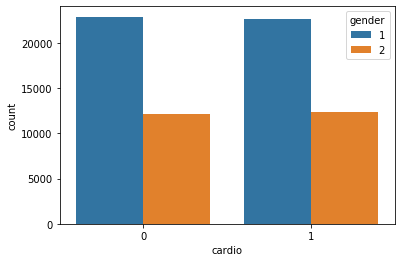

In [5]:
sns.countplot(x='cardio', data=df, hue='gender')

In [6]:
cardio_corr = df.corr()['cardio'].drop('cardio')
print(cardio_corr)

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64


In [7]:
def train_model(model, x_tr, x_te):
    model.fit(x_tr,y_train)
    print('Model score = ', model.score(x_te, y_score)*100, '%')

In [8]:
# Split data
rnd = np.random.rand(len(df)) < 0.85
df_train_test = df[rnd]
df_val = df[~rnd]

# Declare training/scoring data
x = df_train_test.drop('cardio',axis=1)
y = df_train_test['cardio']
x_train, x_score, y_train, y_score = train_test_split(x, y, test_size=0.15, random_state=75)

In [9]:
# Logistical Regression
lr = LogisticRegression()

In [10]:
th = [0.001, 0.005, 0.01, 0.05, 0.1]
for i in th:
    print('\n', 'Model Threshold: ', float(i * 100), '%')
    attr_i = cardio_corr.abs()[cardio_corr.abs() > i].index.tolist()
    x_train_i = x_train[attr_i]
    x_score_i = x_score[attr_i]
    train_model(lr, x_train_i, x_score_i)


 Model Threshold:  0.1 %
Model score =  70.36622242132378 %

 Model Threshold:  0.5 %
Model score =  70.36622242132378 %

 Model Threshold:  1.0 %
Model score =  70.32142457162055 %

 Model Threshold:  5.0 %
Model score =  71.62056221301377 %

 Model Threshold:  10.0 %
Model score =  63.98252883861575 %


In [11]:
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_train_ = pd.DataFrame(x_train_scaled, columns=df.columns[:-1])

In [12]:
scale.fit(x_score)
x_score_scaled = scale.transform(x_score)
x_score_ = pd.DataFrame(x_score_scaled, columns=df.columns[:-1])

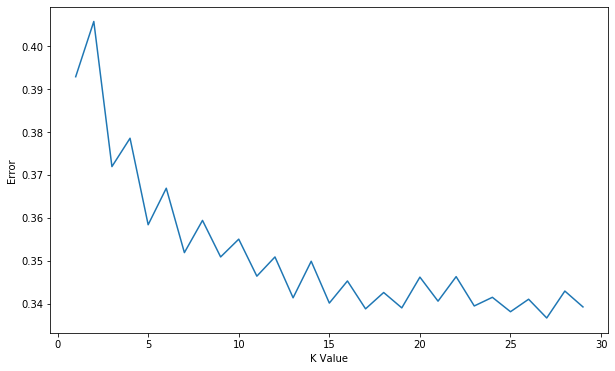

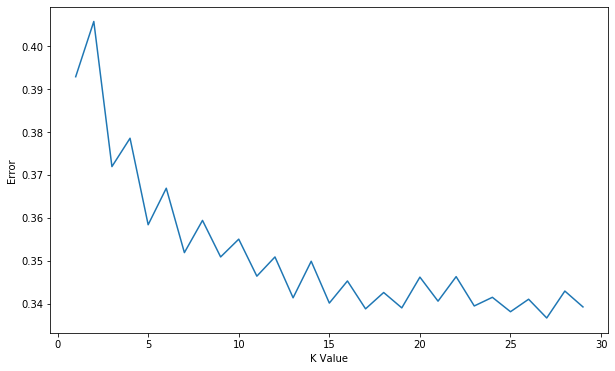

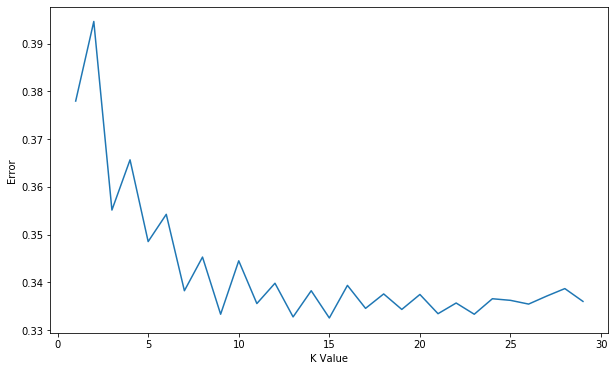

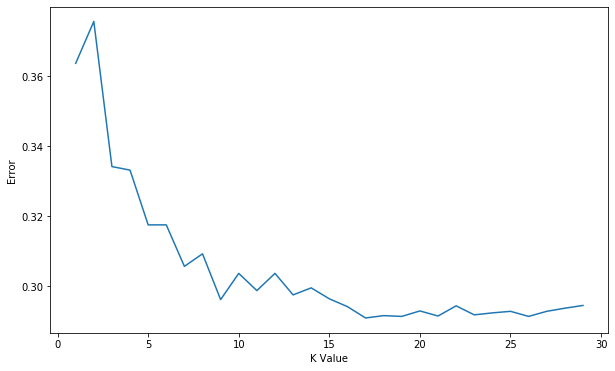

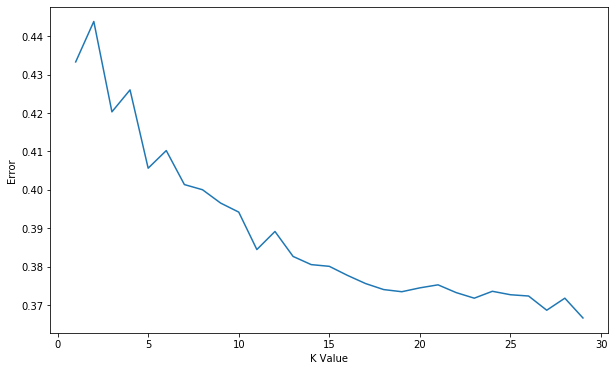

In [13]:
# Find the best thresholds
for i in th:
    feature = cardio_corr.abs()[cardio_corr.abs() > i].index.tolist()
    x_train_k = x_train_[feature]
    x_score_k = x_score_[feature]
    err = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(x_train_k, y_train)
        pred_j = knn.predict(x_score_k)
        err.append(np.mean(y_score != pred_j))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,30),err)
    plt.xlabel('K Value')
    plt.ylabel('Error')

In [14]:
# Attribute input set to 0.05 for best result
feat_final = cardio_corr.abs()[cardio_corr.abs() > 0.05].index.tolist()
print(feat_final)

['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [16]:
# Scaling data
x_train = x_train_[feat_final]
x_val = np.asanyarray(df_val[feat_final])
y_val = np.asanyarray(df_val['cardio'])

scale.fit(x_val)
x_val_scaled = scale.transform(x_val)
x_val_ = pd.DataFrame(x_val_scaled, columns=df_val[feat_final].columns)

In [17]:
# K-NN with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
pred = knn.predict(x_val_)

In [18]:
# Confusion Matrix
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[3880 1301]
 [1765 3532]]

               precision    recall  f1-score   support

           0       0.69      0.75      0.72      5181
           1       0.73      0.67      0.70      5297

    accuracy                           0.71     10478
   macro avg       0.71      0.71      0.71     10478
weighted avg       0.71      0.71      0.71     10478



In [19]:
# Logistic regression
lr.fit(x_train,y_train)
pred = lr.predict(x_val_)

In [20]:
# Confusion Matrix
print('Confusion Matrix =\n',confusion_matrix(y_val, pred))
print('\n',classification_report(y_val, pred))

Confusion Matrix =
 [[3959 1222]
 [1806 3491]]

               precision    recall  f1-score   support

           0       0.69      0.76      0.72      5181
           1       0.74      0.66      0.70      5297

    accuracy                           0.71     10478
   macro avg       0.71      0.71      0.71     10478
weighted avg       0.71      0.71      0.71     10478

